## Imports & Setup

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV

from imblearn.over_sampling import SMOTE
import lightgbm as lgb

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## Load Dataset

In [86]:
# 📌 Cell 2: Load Data
file_path = "breast_cancer.csv"
df = pd.read_csv(file_path)

# Drop ID column
df.drop(columns=["id"], inplace=True)
print("Shape:", data.shape)
print("Columns:", list(data.columns))
# Encode target (M=1, B=0)
label_encoder = LabelEncoder()
df["diagnosis"] = label_encoder.fit_transform(df["diagnosis"])

df.head()


Shape: (569, 31)
Columns: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [87]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [88]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Clean (drop ID)

In [90]:
df = df.copy()

# drop id-like column if present
if "id" in df.columns:
    df = df.drop(columns=["id"])

## Encode Target

In [91]:
# encode target: diagnosis (B=0, M=1)
assert "diagnosis" in df.columns, "Target column 'diagnosis' not found."
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])  # B->0, M->1

## Handle Missing

In [92]:
na_before = df.isna().sum()
num_cols = [c for c in df.columns if c != "diagnosis"]
for c in num_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

print("Missing values before:\n", na_before[na_before > 0])
print("Missing values after:\n", df.isna().sum()[df.isna().sum() > 0])
df.head()

Missing values before:
 Series([], dtype: int64)
Missing values after:
 Series([], dtype: int64)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Lightweight Feature Engineering (no target leakage)

In [94]:
fe = df.copy()
eps = 1e-9

# shape ratios (robust geometric relations)
if set(["area_mean", "perimeter_mean", "radius_mean"]).issubset(fe.columns):
    fe["area_perimeter_ratio_mean"]  = fe["area_mean"]      / (fe["perimeter_mean"] + eps)
    fe["perimeter_radius_ratio_mean"]= fe["perimeter_mean"] / (fe["radius_mean"] + eps)

if set(["area_worst", "perimeter_worst", "radius_worst"]).issubset(fe.columns):
    fe["area_perimeter_ratio_worst"]   = fe["area_worst"]      / (fe["perimeter_worst"] + eps)
    fe["perimeter_radius_ratio_worst"] = fe["perimeter_worst"] / (fe["radius_worst"] + eps)

# worst/mean stability ratios
pairs = [
    ("radius_worst","radius_mean"),
    ("perimeter_worst","perimeter_mean"),
    ("area_worst","area_mean"),
    ("compactness_worst","compactness_mean"),
    ("concavity_worst","concavity_mean"),
    ("concave points_worst","concave points_mean"),
]
for w, m in pairs:
    if w in fe.columns and m in fe.columns:
        fe[f"{w}_over_{m}"] = fe[w] / (fe[m] + eps)

print("New cols:", [c for c in fe.columns if c not in df.columns])
fe.head()

New cols: ['area_perimeter_ratio_mean', 'perimeter_radius_ratio_mean', 'area_perimeter_ratio_worst', 'perimeter_radius_ratio_worst', 'radius_worst_over_radius_mean', 'perimeter_worst_over_perimeter_mean', 'area_worst_over_area_mean', 'compactness_worst_over_compactness_mean', 'concavity_worst_over_concavity_mean', 'concave points_worst_over_concave points_mean']


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_perimeter_ratio_mean,perimeter_radius_ratio_mean,area_perimeter_ratio_worst,perimeter_radius_ratio_worst,radius_worst_over_radius_mean,perimeter_worst_over_perimeter_mean,area_worst_over_area_mean,compactness_worst_over_compactness_mean,concavity_worst_over_concavity_mean,concave points_worst_over_concave points_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,8.151466,6.826014,10.937161,7.273444,1.410784,1.503257,2.016983,2.397695,2.372209,1.804215
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,9.977427,6.460865,12.317380,6.354542,1.214876,1.194883,1.475113,2.372838,2.780207,2.650705
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,9.253846,6.602336,11.206557,6.470089,1.197054,1.173077,1.420615,2.654784,2.281662,1.899922
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,4.976798,6.793345,5.741883,6.631120,1.305604,1.274426,1.470344,3.051427,2.845485,2.447719
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,9.600296,6.658452,10.348226,6.752440,1.110892,1.126573,1.214341,1.543675,2.020202,1.558006


## Visualizations

In [95]:
from sklearn.preprocessing import StandardScaler

feature_cols = [c for c in fe.columns if c != "diagnosis"]
X_feat = fe[feature_cols].copy()

_feature_scaler = StandardScaler()
X_scaled = pd.DataFrame(_feature_scaler.fit_transform(X_feat), columns=feature_cols)

X_feat.shape, X_scaled.shape

((569, 40), (569, 40))

## Correlation Heatmap (features only)

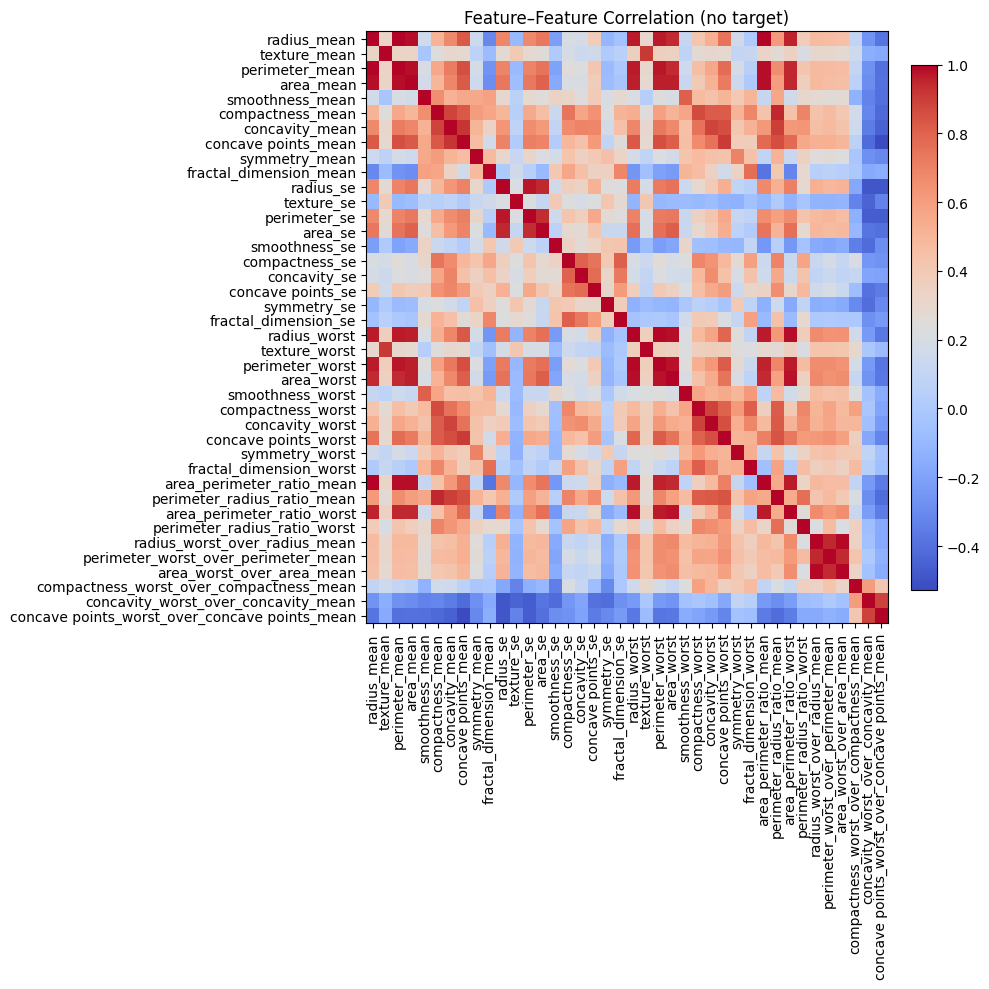

In [96]:
corr = X_feat.corr().values
labels = X_feat.columns.tolist()

plt.figure(figsize=(10, 10))
im = plt.imshow(corr, cmap='coolwarm', interpolation='nearest', aspect='auto')
plt.title("Feature–Feature Correlation (no target)")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=90)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.tight_layout()
plt.show()

## Top Absolute Correlated Pairs (table)

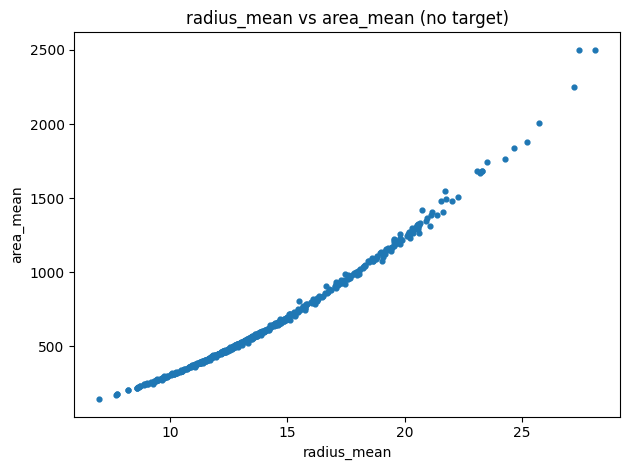

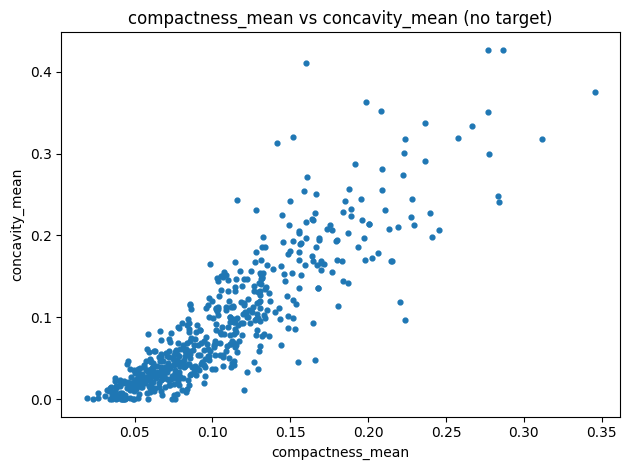

In [97]:
def scatter_two_features(df, f1, f2, use_scaled=False):
    src = X_scaled if use_scaled else df
    plt.figure()
    plt.scatter(src[f1], src[f2], s=12)
    sp = " (scaled)" if use_scaled else ""
    plt.title(f"{f1} vs {f2}{sp} (no target)")
    plt.xlabel(f1); plt.ylabel(f2)
    plt.tight_layout(); plt.show()

# examples — edit freely
scatter_two_features(X_feat, "radius_mean", "area_mean")
scatter_two_features(X_feat, "compactness_mean", "concavity_mean")

## Histograms (first K features, one plot per feature)